In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
#sns.set()

In [23]:
data_raw = pd.read_csv('Company_Data (1).csv')
data_raw

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [24]:
data = data_raw.copy()

In [25]:
x = 0
for i in data_raw['Sales']:
    if i < np.percentile(data_raw['Sales'] , 25):
        data['Sales'][x] = 'Low'
    elif np.percentile(data_raw['Sales'], 25) <= i < np.percentile(data_raw['Sales'], 75):
        data['Sales'][x] = 'Average'
    else:
        data['Sales'][x] = 'High'
    x += 1
data

C:\Users\WAY TOMORROW\AppData\Local\Temp/ipykernel_30664/65850537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'High'
C:\Users\WAY TOMORROW\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Average,100,79,7,284,95,Bad,50,12,Yes,Yes


In [26]:
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [27]:
X['ShelveLoc'] = X['ShelveLoc'].map({'Bad' : 0, 'Medium' : 1, 'Good' : 3})
X['Urban'] = X['Urban'].map({'No' : 0, 'Yes' : 1})
X['US'] = X['US'].map({'No' : 0, 'Yes' : 1})
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,3,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,3,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [28]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [30]:
kfold = KFold(10)
accuracy = []
for i in range (1,201):
    forest = RandomForestClassifier(random_state = 42, n_estimators = i)
    result = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(result))
accuracy

[0.5125,
 0.5650000000000001,
 0.5875,
 0.6024999999999999,
 0.5950000000000001,
 0.6025,
 0.61,
 0.6050000000000001,
 0.595,
 0.6024999999999999,
 0.5925,
 0.595,
 0.615,
 0.61,
 0.625,
 0.6149999999999999,
 0.6100000000000001,
 0.6249999999999999,
 0.6425,
 0.6475,
 0.6525000000000001,
 0.655,
 0.66,
 0.655,
 0.6475,
 0.6575,
 0.65,
 0.65,
 0.665,
 0.6675,
 0.675,
 0.665,
 0.6699999999999999,
 0.6625,
 0.6725,
 0.6725000000000001,
 0.6725000000000001,
 0.6675,
 0.6675,
 0.6675,
 0.6725000000000001,
 0.6725,
 0.6725,
 0.675,
 0.6799999999999999,
 0.6725000000000001,
 0.68,
 0.6849999999999999,
 0.6775,
 0.675,
 0.67,
 0.6799999999999999,
 0.6799999999999999,
 0.6775,
 0.6825,
 0.6775,
 0.675,
 0.6724999999999999,
 0.6775,
 0.6775,
 0.685,
 0.6825,
 0.6875,
 0.6775,
 0.685,
 0.6799999999999999,
 0.6799999999999999,
 0.6775,
 0.6799999999999999,
 0.6824999999999999,
 0.6849999999999999,
 0.6799999999999999,
 0.6799999999999999,
 0.6825,
 0.6875,
 0.69,
 0.6975,
 0.6874999999999999,
 0.7

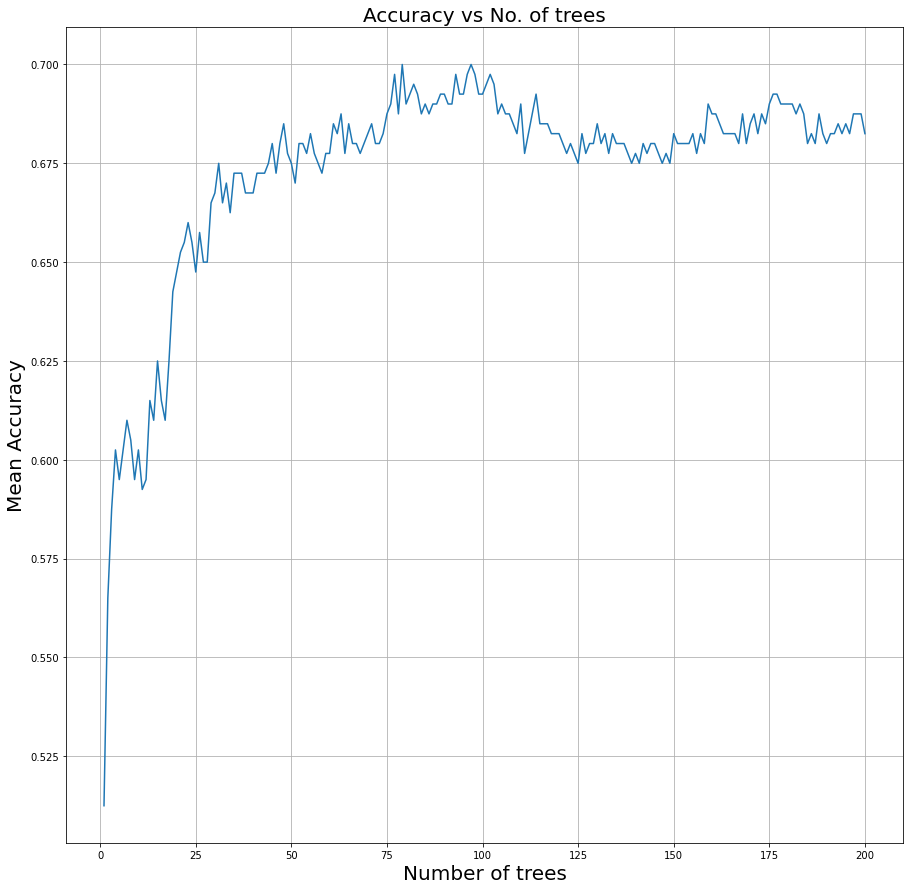

In [31]:
plt.figure(figsize = (15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel('Number of trees', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Accuracy vs No. of trees', fontsize = 20)
plt.grid()
plt.show()

In [32]:
n_est_ideal = accuracy.index(max(accuracy))

In [33]:
forest = RandomForestClassifier(n_estimators = n_est_ideal, random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=96, random_state=42)

In [34]:
predictions = forest.predict(X_test)
np.mean(predictions == y_test)

0.7

In [35]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[32,  4,  4],
       [ 8, 15,  0],
       [ 8,  0,  9]], dtype=int64)

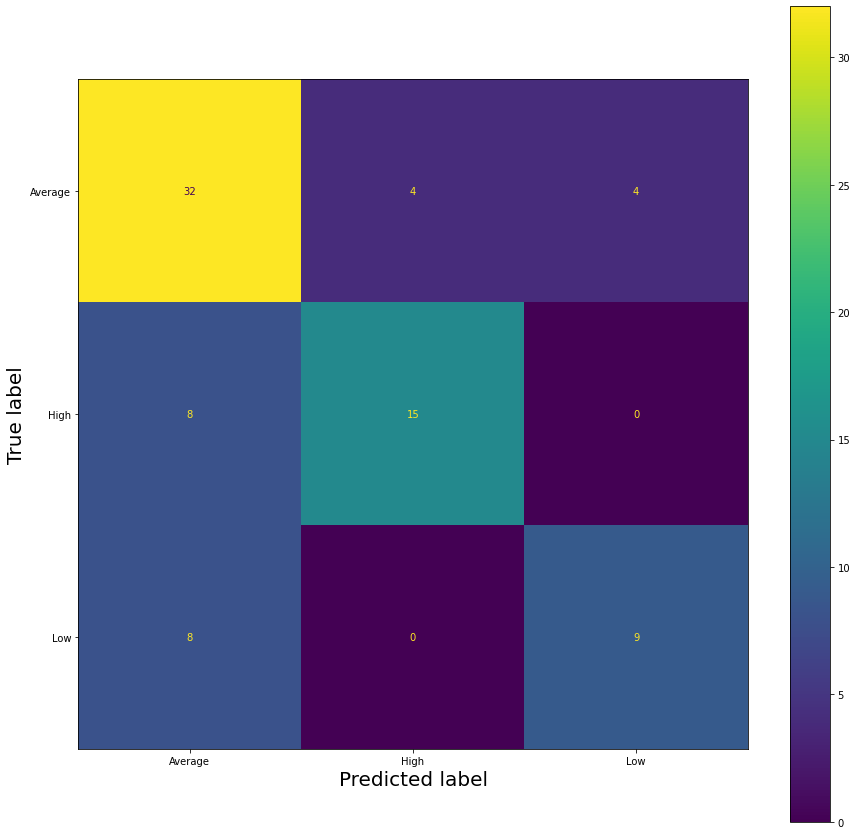

In [36]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(forest, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted label', fontsize = 20)
ax.set_ylabel('True label', fontsize = 20)
plt.show()